# Data Intensive Architectures (H8DIA) Project: Processing Datasets with Apache MapReduce


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('max_row', None)


In [3]:
vaccine_df = pd.read_csv(r"C:\Users\Jack Dunne\Desktop\NCI_DIA\vaccines_covid.csv")


vaccine_df = vaccine_df.loc[vaccine_df['ReportingCountry'] == 'IE']
vaccine_df = vaccine_df.iloc[:, [0,1,5,11,12]]
vaccine_df = vaccine_df.loc[vaccine_df['TargetGroup'] == 'ALL']

vaccine_df = pd.DataFrame(vaccine_df.groupby(['YearWeekISO'])['FirstDose'].sum())
vaccine_df['cumulative_doses'] = vaccine_df['FirstDose'].cumsum()

vaccine_df = vaccine_df.reset_index()
vaccine_df['YearWeekISO'] = pd.to_datetime(vaccine_df['YearWeekISO'] + '0', format='%Y-W%W%w')

vaccine_df.rename(columns={'YearWeekISO': 'year_week'}, inplace=True)

In [4]:
tests_df = pd.read_csv(r"C:\Users\Jack Dunne\Desktop\NCI_DIA\tests_covid.csv")


tests_df = tests_df.loc[tests_df['country_code'] == 'IE']
tests_df = tests_df.iloc[:, [2,7]]
tests_df['year_week'] = pd.to_datetime(tests_df['year_week'] + '0', format='%Y-W%W%w')

In [5]:
cases_df = pd.read_csv(r"C:\Users\Jack Dunne\Desktop\NCI_DIA\deaths_and_cases.csv")

cases_df = cases_df.loc[cases_df['geoId'] == 'IE']
cases_df = cases_df.iloc[:, [0,4,5]]

cases_df['dateRep'] = pd.to_datetime(cases_df['dateRep'], format='%d/%m/%Y')
cases_df = cases_df.set_index('dateRep')
cases_df = cases_df[['cases', 'deaths']].resample('W').sum()

cases_df['cases_cumulative'] = cases_df['cases'].cumsum()
cases_df['deaths_cumulative'] = cases_df['deaths'].cumsum()


cases_df = cases_df.reset_index()

cases_df.rename(columns={'dateRep': 'year_week'}, inplace=True)

In [48]:
cases_df.head()

,year_week,cases,deaths,cases_cumulative,deaths_cumulative
0,2020-03-01,1.0,0.0,1.0,0.0
1,2020-03-08,20.0,0.0,21.0,0.0
2,2020-03-15,148.0,2.0,169.0,2.0
3,2020-03-22,737.0,2.0,906.0,4.0
4,2020-03-29,1719.0,42.0,2625.0,46.0


In [7]:
cases_df.to_csv('cases_cleaned.csv', sep=',', encoding='utf-8')
tests_df.to_csv('tests_cleaned.csv', sep=',', encoding='utf-8')
vaccine_df.to_csv('vaccine_cleaned.csv', sep=',', encoding='utf-8')

# importing the MR dataset and doing the analysis

In [9]:
COVID_MR_df = pd.read_csv(r"C:\Users\Jack Dunne\Desktop\NCI_DIA\COVID_MR.csv")
COVID_MR_df.drop('Unnamed: 0', axis=1, inplace=True)

COVID_MR_df['deaths'] += 1 
COVID_MR_df['cases'] += 1

In [10]:
COVID_MR_df

,year_week,cases,deaths,cases_cumulative,deaths_cumulative,tests_done,FirstDose,cumulative_doses
0,2021-01-03,15758.0,55.0,101887.0,2259.0,103126,0,0
1,2021-01-10,45726.0,85.0,147613.0,2344.0,154955,3957,3957
2,2021-01-10,45726.0,85.0,147613.0,2344.0,154955,48450,52407
3,2021-01-10,45726.0,85.0,147613.0,2344.0,178458,3957,3957
4,2021-01-10,45726.0,85.0,147613.0,2344.0,178458,48450,52407
5,2021-01-17,25113.0,264.0,172726.0,2608.0,160834,48813,101220
6,2021-01-24,14828.0,362.0,187554.0,2970.0,146868,46257,147477
7,2021-01-31,8993.0,337.0,196547.0,3307.0,137069,7607,155084
8,2021-02-07,7021.0,379.0,203568.0,3686.0,122834,8879,163963
9,2021-02-14,6014.0,262.0,209582.0,3948.0,113628,28302,192265


In [16]:
date = COVID_MR_df['year_week']

cases = COVID_MR_df['cases']
deaths = COVID_MR_df['deaths']
tests = COVID_MR_df['tests_done']

vaccines = COVID_MR_df['cumulative_doses']
cases_cumulative = COVID_MR_df['cases_cumulative']
deaths_cumulative = COVID_MR_df['deaths_cumulative']


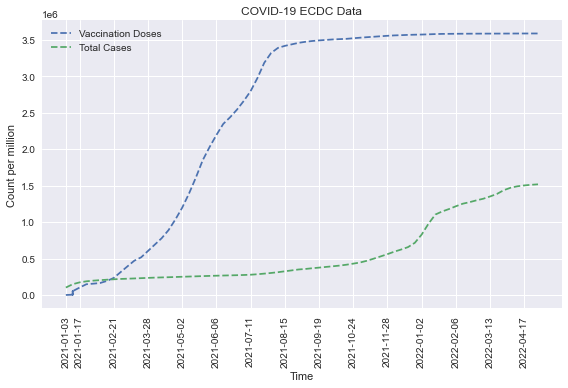

In [22]:
# To what extent do COVID-19 cases correlate with vaccinations rates?


plt.style.use('seaborn')

plt.plot(date, vaccines, linestyle='--', label='Vaccination Doses')
plt.plot(date, cases_cumulative, linestyle='--', label='Total Cases')

plt.legend()
plt.title('COVID-19 ECDC Data')
plt.xlabel('Time')
plt.xticks(date[::5],  rotation='vertical')
plt.ylabel('Count per million')

plt.tight_layout()

Correlation is equal to  0.748


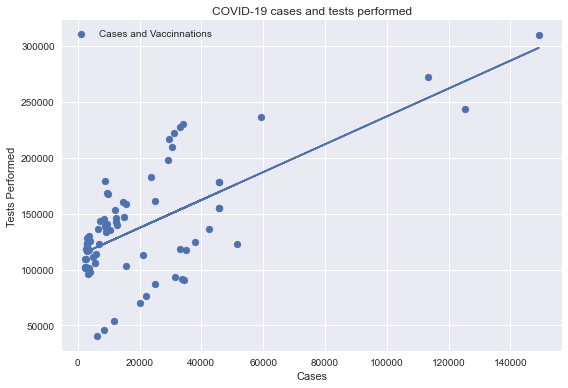

In [36]:
# What is the relationship between COVID-19 cases and tests performed?

plt.scatter(cases, tests, label='Cases and Vaccinnations')

plt.legend()
plt.title('COVID-19 cases and tests performed')
plt.xlabel('Cases')
plt.ylabel('Tests Performed')

m, b = np.polyfit(cases, tests, 1)
plt.plot(cases, m*cases + b, label='Line of Best Fit')

plt.tight_layout()

COVID_MR_df['cases_perc_change'] = COVID_MR_df['cases'].pct_change()
COVID_MR_df['tests_perc_change'] = COVID_MR_df['tests_done'].pct_change()

correlation = COVID_MR_df['cases_perc_change'].corr(COVID_MR_df['tests_perc_change'])
print('Correlation is equal to ', round(correlation,3))

In [37]:
COVID_MR_df.columns

Index(['year_week', 'cases', 'deaths', 'cases_cumulative', 'deaths_cumulative',
       'tests_done', 'FirstDose', 'cumulative_doses', 'cases_perc_change',
       'tests_perc_change'],
      dtype='object')

Correlation is equal to  -0.01083290840632685


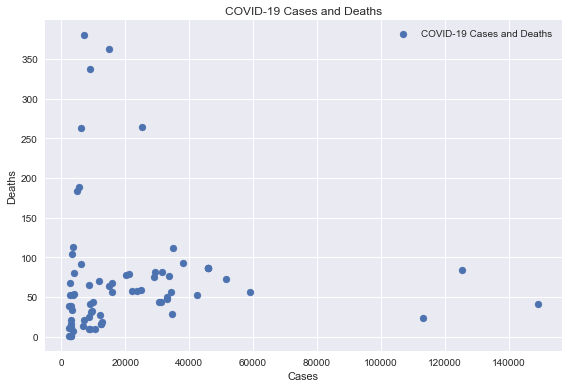

In [47]:
# What is the relationship between COVID-19 cases and deaths?

plt.scatter(cases, deaths, label='COVID-19 Cases and Deaths')

plt.legend()
plt.title('COVID-19 Cases and Deaths')
plt.xlabel('Cases')
plt.ylabel('Deaths')


plt.tight_layout()



COVID_MR_df['deaths_perc_change'] = COVID_MR_df['deaths'].pct_change()

correlation = COVID_MR_df['deaths_perc_change'].corr(COVID_MR_df['cases_perc_change'])
print('Correlation is equal to ', correlation)